# Identify STRs that are at splice sites
Like the ENCODE paper, define a splice site as being within 300bp of an exon. All of the following uses the GRCh37 alignments (GENCODE v19 annotations), also like the paper. 
Links to [GENCODE data](https://www.gencodegenes.org/human/release_37lift37.html)

In [180]:
import pyranges as pr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the STR data

In [181]:
col_names = ["Chromosome", "Start", "End", "class", 
            "length", "Strand", "num_units", 
            "actual_repeat", "gene_id", "gene_start",
            "gene_stop", "gene_strand", "annotation",
            "promoter", "dist_to_tss"]
dtype_dict = {"Chromosome": np.str, "Start":np.int, "End":np.int, "length": np.int, 
             "Strand": np.str} #, "gene_start": np.int, "gene_stop": np.int, "dist_to_tss": np.int}
str_df = pd.read_csv("data/msdb_data.tsv", sep = '\t', dtype = dtype_dict, names = col_names, index_col = False, na_values = "")
str_df.head()

/Users/david/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (9,10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Chromosome,Start,End,class,length,Strand,num_units,actual_repeat,gene_id,gene_start,gene_stop,gene_strand,annotation,promoter,dist_to_tss
0,chr1,10000,10108,AACCCT,108,+,18,TAACCC,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1766
1,chr1,10108,10149,AACCCT,41,+,6,AACCCT,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1725
2,chr1,10147,10179,AACCCT,32,+,5,CCCTAA,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1695
3,chr1,10172,10184,AACCT,12,+,2,CCTAA,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1690
4,chr1,10177,10233,AACCCT,56,+,9,CCTAAC,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1641


In [182]:
str_pr = pr.PyRanges(str_df)
str_pr.head()

,Chromosome,Start,End,class,length,Strand,num_units,actual_repeat,gene_id,gene_start,gene_stop,gene_strand,annotation,promoter,dist_to_tss
0,chr1,10000,10108,AACCCT,108,+,18,TAACCC,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1766
1,chr1,10108,10149,AACCCT,41,+,6,AACCCT,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1725
2,chr1,10147,10179,AACCCT,32,+,5,CCCTAA,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1695
3,chr1,10172,10184,AACCT,12,+,2,CCTAA,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1690
4,chr1,10177,10233,AACCCT,56,+,9,CCTAAC,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1641
5,chr1,10231,10249,AACCCT,18,+,3,CCCTAA,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1625
6,chr1,10255,10290,AACCCT,35,+,5,AACCCT,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1584
7,chr1,10285,10326,AACCCC,41,+,6,AACCCC,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1548


Load the UCSC exons and introns

In [183]:
col_names = ["Chromosome", "Start", "End", "ucsc_id", "Strand"]
exon_df = pd.read_csv("data/ucsc_exons.bed", sep = '\t', names = col_names, index_col = False, skiprows = [0], usecols = [0,1,2,3,5])
exon_pr = pr.PyRanges(exon_df)
exon_pr.head()

,Chromosome,Start,End,ucsc_id,Strand
0,chr1,11873,12227,uc001aaa.3_exon_0_0_chr1_11874_f,+
1,chr1,12612,12721,uc001aaa.3_exon_1_0_chr1_12613_f,+
2,chr1,13220,14409,uc001aaa.3_exon_2_0_chr1_13221_f,+
3,chr1,11873,12227,uc010nxr.1_exon_0_0_chr1_11874_f,+
4,chr1,12645,12697,uc010nxr.1_exon_1_0_chr1_12646_f,+
5,chr1,13220,14409,uc010nxr.1_exon_2_0_chr1_13221_f,+
6,chr1,11873,12227,uc010nxq.1_exon_0_0_chr1_11874_f,+
7,chr1,12594,12721,uc010nxq.1_exon_1_0_chr1_12595_f,+


In [184]:
col_names = ["Chromosome", "Start", "End", "ucsc_id", "Strand"]
intron_df = pd.read_csv("data/ucsc_introns.bed", sep = '\t', names = col_names, index_col = False, skiprows = [0], usecols = [0,1,2,3,5])
intron_pr = pr.PyRanges(intron_df)
intron_pr.head()

,Chromosome,Start,End,ucsc_id,Strand
0,chr1,12227,12612,uc001aaa.3_intron_0_0_chr1_12228_f,+
1,chr1,12721,13220,uc001aaa.3_intron_1_0_chr1_12722_f,+
2,chr1,12227,12645,uc010nxr.1_intron_0_0_chr1_12228_f,+
3,chr1,12697,13220,uc010nxr.1_intron_1_0_chr1_12698_f,+
4,chr1,12227,12594,uc010nxq.1_intron_0_0_chr1_12228_f,+
5,chr1,12721,13402,uc010nxq.1_intron_1_0_chr1_12722_f,+
6,chr1,324345,324438,uc021oeh.1_intron_0_0_chr1_324346_f,+
7,chr1,324686,324718,uc021oeh.1_intron_1_0_chr1_324687_f,+


Next, get all the intervals of short tandem repeats that are intron-internal (in an intron and farther than 300 bp from a splice site):

In [185]:
# distance from all STRs to nearest exon
nearest_exon_pr = str_pr.nearest(exon_pr).sort()
nearest_exon_pr.head()

,Chromosome,Start,End,class,length,Strand,num_units,actual_repeat,gene_id,gene_start,gene_stop,gene_strand,annotation,promoter,dist_to_tss,Start_b,End_b,ucsc_id,Strand_b,Distance
0,chr1,10000,10108,AACCCT,108,+,18,TAACCC,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1766,11873,12227,uc001aaa.3_exon_0_0_chr1_11874_f,+,1766
1,chr1,10108,10149,AACCCT,41,+,6,AACCCT,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1725,11873,12227,uc001aaa.3_exon_0_0_chr1_11874_f,+,1725
2,chr1,10147,10179,AACCCT,32,+,5,CCCTAA,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1695,11873,12227,uc001aaa.3_exon_0_0_chr1_11874_f,+,1695
3,chr1,10172,10184,AACCT,12,+,2,CCTAA,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1690,11873,12227,uc001aaa.3_exon_0_0_chr1_11874_f,+,1690
4,chr1,10177,10233,AACCCT,56,+,9,CCTAAC,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1641,11873,12227,uc001aaa.3_exon_0_0_chr1_11874_f,+,1641
5,chr1,10231,10249,AACCCT,18,+,3,CCCTAA,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1625,11873,12227,uc001aaa.3_exon_0_0_chr1_11874_f,+,1625
6,chr1,10255,10290,AACCCT,35,+,5,AACCCT,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1584,11873,12227,uc001aaa.3_exon_0_0_chr1_11874_f,+,1584
7,chr1,10285,10326,AACCCC,41,+,6,AACCCC,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1548,11873,12227,uc001aaa.3_exon_0_0_chr1_11874_f,+,1548


In [186]:
# grab intron-annotated STRs and filter those with distance > 300bp
intron_internal_pr = nearest_exon_pr[(nearest_exon_pr.annotation == 'Intron') & (nearest_exon_pr.Distance > 300)].sort()
intron_internal_pr.head()

,Chromosome,Start,End,class,length,Strand,num_units,actual_repeat,gene_id,gene_start,gene_stop,gene_strand,annotation,promoter,dist_to_tss,Start_b,End_b,ucsc_id,Strand_b,Distance
0,chr1,22811,22823,AAAGG,12,+,2,AGGAA,uc001aac.4,14362,29370,-,Intron,Non-Promoter,6547,24737,24891,uc009viw.2_exon_5_0_chr1_24738_r,-,1915
1,chr1,23874,23886,ACCTCC,12,+,2,CCTCCA,uc009viq.3,14362,29370,-,Intron,Non-Promoter,5484,24737,24891,uc009viw.2_exon_5_0_chr1_24738_r,-,852
2,chr1,669727,669739,AAC,12,+,4,AAC,uc009vjm.3,661139,670994,-,Intron,Non-Promoter,1255,668686,668744,uc009vjm.3_exon_1_0_chr1_668687_r,-,984
3,chr1,676490,676503,AAAAG,13,+,2,AAAAG,uc001abm.2,674240,679736,-,Intron,Non-Promoter,3233,675508,675566,uc002khh.3_exon_4_0_chr1_675509_r,-,925
4,chr1,700958,700970,AAATAC,12,+,2,TACAAA,uc001abo.3,700245,714068,-,Intron,Non-Promoter,13098,700244,700627,uc001abo.3_exon_0_0_chr1_700245_r,-,332
5,chr1,701123,701136,A,13,+,13,A,uc001abo.3,700245,714068,-,Intron,Non-Promoter,12932,700244,700627,uc001abo.3_exon_0_0_chr1_700245_r,-,497
6,chr1,701240,701253,ACTCC,13,+,2,CCACT,uc001abo.3,700245,714068,-,Intron,Non-Promoter,12815,701708,701767,uc001abo.3_exon_1_0_chr1_701709_r,-,456
7,chr1,702159,702173,AATC,14,+,3,ATCA,uc001abo.3,700245,714068,-,Intron,Non-Promoter,11895,701708,701767,uc001abo.3_exon_1_0_chr1_701709_r,-,393


(array([1.311322e+06, 1.827140e+05, 7.396700e+04, 3.598300e+04,
        1.929500e+04, 1.112300e+04, 6.730000e+03, 4.103000e+03,
        2.812000e+03, 1.836000e+03, 1.260000e+03, 8.590000e+02,
        5.600000e+02, 4.270000e+02, 3.110000e+02, 2.250000e+02,
        2.070000e+02, 1.890000e+02, 1.680000e+02, 1.800000e+02,
        1.170000e+02, 6.100000e+01, 4.500000e+01, 3.700000e+01,
        6.300000e+01, 4.400000e+01, 6.000000e+01, 3.800000e+01,
        4.800000e+01, 4.100000e+01]),
 array([3.01000000e+02, 1.86616667e+04, 3.70223333e+04, 5.53830000e+04,
        7.37436667e+04, 9.21043333e+04, 1.10465000e+05, 1.28825667e+05,
        1.47186333e+05, 1.65547000e+05, 1.83907667e+05, 2.02268333e+05,
        2.20629000e+05, 2.38989667e+05, 2.57350333e+05, 2.75711000e+05,
        2.94071667e+05, 3.12432333e+05, 3.30793000e+05, 3.49153667e+05,
        3.67514333e+05, 3.85875000e+05, 4.04235667e+05, 4.22596333e+05,
        4.40957000e+05, 4.59317667e+05, 4.77678333e+05, 4.96039000e+05,
        5.

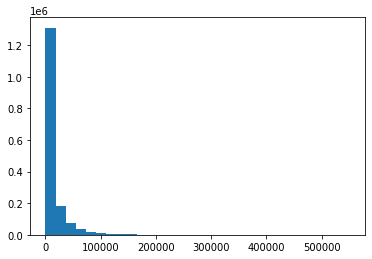

In [187]:
# make a histogram of the distances
fig, ax = plt.subplots()
ax.hist(intron_internal_pr.Distance, bins = 30)

Now, get the STRs that are within 300bp of a splice site:

In [188]:
# this means being within 300 bp of an intron AND 300 bp of an exon

# get all the intron coordinates and get the nearest intron to each STR
nearest_intron_pr = str_pr.nearest(intron_pr).sort()
nearest_intron_pr.head()

,Chromosome,Start,End,class,length,Strand,num_units,actual_repeat,gene_id,gene_start,gene_stop,gene_strand,annotation,promoter,dist_to_tss,Start_b,End_b,ucsc_id,Strand_b,Distance
0,chr1,10000,10108,AACCCT,108,+,18,TAACCC,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1766,12227,12594,uc010nxq.1_intron_0_0_chr1_12228_f,+,2120
1,chr1,10108,10149,AACCCT,41,+,6,AACCCT,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1725,12227,12594,uc010nxq.1_intron_0_0_chr1_12228_f,+,2079
2,chr1,10147,10179,AACCCT,32,+,5,CCCTAA,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1695,12227,12594,uc010nxq.1_intron_0_0_chr1_12228_f,+,2049
3,chr1,10172,10184,AACCT,12,+,2,CCTAA,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1690,12227,12594,uc010nxq.1_intron_0_0_chr1_12228_f,+,2044
4,chr1,10177,10233,AACCCT,56,+,9,CCTAAC,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1641,12227,12594,uc010nxq.1_intron_0_0_chr1_12228_f,+,1995
5,chr1,10231,10249,AACCCT,18,+,3,CCCTAA,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1625,12227,12594,uc010nxq.1_intron_0_0_chr1_12228_f,+,1979
6,chr1,10255,10290,AACCCT,35,+,5,AACCCT,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1584,12227,12594,uc010nxq.1_intron_0_0_chr1_12228_f,+,1938
7,chr1,10285,10326,AACCCC,41,+,6,AACCCC,uc001aaa.3,11874,14409,+,Intergenic,Non-Promoter,-1548,12227,12594,uc010nxq.1_intron_0_0_chr1_12228_f,+,1902


In [189]:
# nearest_exon_pr = nearest_exon_pr.drop_duplicate_positions()
# nearest_intron_pr = nearest_intron_pr.drop_duplicate_positions()

# remove the chromosomes that present in the exon PyRanges but not the introns
to_remove = list(set(nearest_exon_pr.Chromosome).difference(set(nearest_intron_pr.Chromosome)))
nearest_exon_pr = nearest_exon_pr[~nearest_exon_pr.Chromosome.isin(to_remove)]

# verify that the nearest_to pyranges are the same length and contain the same STRs
print(len(nearest_intron_pr))
print(len(nearest_exon_pr))
print((nearest_intron_pr.Chromosome == nearest_exon_pr.Chromosome).product())
print((nearest_intron_pr.Start == nearest_exon_pr.Start).product())

4390676
4390676
1
1


In [190]:
within_300_pr = nearest_exon_pr[(nearest_exon_pr.Distance <= 300) & (nearest_intron_pr.Distance <= 300)]
within_300_pr.head()

,Chromosome,Start,End,class,length,Strand,num_units,actual_repeat,gene_id,gene_start,gene_stop,gene_strand,annotation,promoter,dist_to_tss,Start_b,End_b,ucsc_id,Strand_b,Distance
0,chr1,13623,13635,ACAGGC,12,+,2,CAGGCA,uc001aaa.3,11874,14409,+,Exon,Non-Promoter,1749,13220,14409,uc001aaa.3_exon_2_0_chr1_13221_f,+,0
1,chr1,15240,15255,AGGGCC,15,+,2,GGGCCA,uc009viv.2,14407,29370,-,Exon,Non-Promoter,14115,14406,16765,uc009viw.2_exon_0_0_chr1_14407_r,-,0
2,chr1,15383,15395,AGGCGC,12,+,2,GCAGGC,uc009viv.2,14407,29370,-,Exon,Non-Promoter,13975,14406,16765,uc009viw.2_exon_0_0_chr1_14407_r,-,0
3,chr1,17476,17488,AGCCG,12,+,2,CCGAG,uc009vjc.1,16858,17751,-,Exon,Promoter,263,17232,17751,uc009vjc.1_exon_1_0_chr1_17233_r,-,0
4,chr1,17801,17814,ATCCC,13,+,2,CCATC,uc009vjd.2,15796,18061,-,Exon,Promoter,247,17605,18061,uc009viq.3_exon_4_0_chr1_17606_r,-,0
5,chr1,18453,18466,AGGCC,13,+,2,GCCAG,uc009vit.3,14362,19759,-,Intron,Non-Promoter,1293,18496,18554,uc009viy.2_exon_6_0_chr1_18497_r,-,31
6,chr1,19412,19424,AGGGGG,12,+,2,GGGAGG,uc009vit.3,14362,19759,-,Exon,Promoter,335,18912,19759,uc009viu.3_exon_9_0_chr1_18913_r,-,0
7,chr1,19516,19528,AAAGCC,12,+,2,AAGCCA,uc001aai.1,16858,19759,-,Exon,Promoter,231,18912,19759,uc009viu.3_exon_9_0_chr1_18913_r,-,0


(array([64779., 43502., 29922., 26343., 26281., 24494., 22928.,   457.]),
 array([  0,   1,  50, 100, 150, 200, 250, 300, 350]),
 <BarContainer object of 8 artists>)

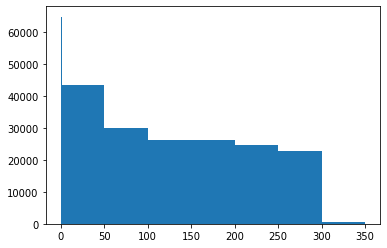

In [191]:
# histogram again
fig, ax = plt.subplots()
ax.hist(within_300_pr.Distance, bins = [0,1] + list(range(50, 400, 50)))

Then, get everything 